In [29]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import interpolate

# load modules related to this exercise
import Exercise_7 as ex7
import tools as tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\krist\AppData\Local\Temp\ipykernel_14016\4150692966.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Exercise 7: Gaussian Shock

Consider again the model from exercise 6, but with an infinite time horizon and interest, $R=1$:
$$\begin{align*}
V_{t}(W_{t}) & = & \max_{C_{t}}\left\{ \frac{C_{t}^{1-\rho}}{1-\rho}+\beta \int_{-\infty}^{\infty} V_{t+1}(W_{t+1})g(y_{t+1})dy_{t+1}\right\} \\
 & \text{s.t.}\\
W_{t+1} & = & R(W_{t}-C_{t})+y_{t+1}\\
y_{t+1}  & = & \exp{(\xi_{t+1})}\\
\xi_{t+1} & \sim  & \mathcal{N}(0,\sigma_{\xi}^{2})\\
A_{t}=W_{t}-C_{t} & \geq & 0
\end{align*}$$

for $T\to \infty$, $\beta=0.90$, $\rho=0.5$, $W=10$ and $\sigma_{\xi}=0.2$.

### 1. Solve the using value function iterations

In [48]:
par = ex7.setup()

# Solve the model
sol = ex7.solve_deaton_infty(par)


### 2. Plot the converged value and policy functions.

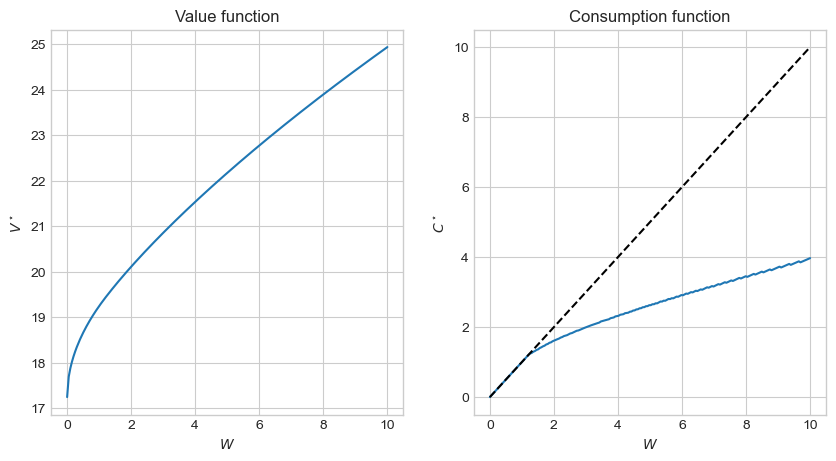

array([0.        , 0.05025126, 0.10050251, 0.15075377, 0.20100503,
       0.25125628, 0.30150754, 0.35175879, 0.40201005, 0.45226131,
       0.50251256, 0.55276382, 0.60301508, 0.65326633, 0.70351759,
       0.75376884, 0.8040201 , 0.85427136, 0.90452261, 0.95477387,
       1.00502513, 1.05527638, 1.10552764, 1.15577889, 1.20603015,
       1.24365546, 1.26057423, 1.29542183, 1.31511831, 1.34744072,
       1.36360193, 1.40122724, 1.42218631, 1.44996338, 1.46814474,
       1.50248731, 1.51814348, 1.55097094, 1.56410192, 1.59541426,
       1.61612081, 1.63581728, 1.65450367, 1.67218   , 1.69995707,
       1.71586576, 1.74238024, 1.7565213 , 1.76965228, 1.79414661,
       1.81813591, 1.8287417 , 1.8514684 , 1.87369006, 1.89540668,
       1.90272973, 1.92318376, 1.94313275, 1.9625767 , 1.98151562,
       1.9999495 , 2.01787834, 2.03530214, 2.0522209 , 2.06863463,
       2.08454332, 2.09994697, 2.11484558, 2.12923916, 2.1605515 ,
       2.17418752, 2.1873185 , 2.19994445, 2.21206535, 2.22368

In [49]:
fig = plt.figure(figsize=(10,5))# figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(par.grid_W,sol.V)
ax.set_xlabel(f"$W$")
ax.set_ylabel(f"$V^\star$")
ax.set_title(f'Value function')

ax_right = fig.add_subplot(1,2,2)
ax_right.plot(par.grid_W,sol.C)
ax_right.set_xlabel(f"$W$")
ax_right.set_ylabel(f"$C^\star$")
ax_right.set_title(f'Consumption function')
ax_right.plot(par.grid_W,par.grid_W,color='black',linestyle='dashed')

plt.show()

sol.C